In [178]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [179]:
data = pd.read_csv('C:/Users/faeze/OneDrive/Desktop/Ironhack/Unit-7/Session-41/data_7.01_activities/files_for_activities/learningSet.csv')
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [180]:
data.shape

(95412, 481)

In [181]:
data.columns = [col_name.upper().replace(' ', '_').replace('/', '') for col_name in data.columns]
data.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [182]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [183]:
dfcat = data.select_dtypes('object')
dfcat

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [184]:
dfnum = data.select_dtypes('number')
dfnum

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


### Lab | Revisiting Machine Learning Case Study

#### 1. Check for null values in all the columns

In [185]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(30)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
RAMNT_4,99.705488
RAMNT_6,99.186685
RDATE_6,99.186685
RAMNT_15,92.388798
RDATE_15,92.388798


#### 2. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

 ###### OSOURCE - symbol definitions not provided, too many categories
 ###### ZIP CODE - we are including state already

In [186]:
drop_list = []
drop_list.extend(['drop_list', 'ZIP_CODE'])
drop_list

['drop_list', 'ZIP_CODE']

#### 3. Identify columns that over 85% missing values

In [187]:
most_missing_value_cols = list(nulls[nulls['percentage'] > 85].index)
most_missing_value_cols

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

#### 4. Remove those columns from the dataframe

In [188]:
drop_list.extend(most_missing_value_cols)
drop_list

['drop_list',
 'ZIP_CODE',
 'NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

#### 5. Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

##### Note that there are a few null values in the column. We will first replace those null values using the code below:

In [189]:
dfcat['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [190]:
#dfcat['GENDER'] = dfcat['GENDER'].fillna('F')

In [191]:
dfcat['GENDER'] = dfcat['GENDER'].replace(' ', 'F')
dfcat['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [192]:
dfcat['GENDER'] = dfcat['GENDER'].apply(lambda x: x if x in ['F', 'M'] else 'Other')

dfcat['GENDER'].value_counts()

F        54234
M        39094
Other     2084
Name: GENDER, dtype: int64

### Lab | Feature engineering

#### 1. Check for null values in the numerical columns.

In [193]:
nulls = pd.DataFrame(dfnum.isna().sum()*100/len(dfnum), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(30)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
RAMNT_4,99.705488
RAMNT_6,99.186685
RDATE_6,99.186685
RDATE_15,92.388798
RAMNT_15,92.388798


#### 2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

array([[<AxesSubplot:title={'center':'WEALTH1'}>,
        <AxesSubplot:title={'center':'ADI'}>],
       [<AxesSubplot:title={'center':'DMA'}>,
        <AxesSubplot:title={'center':'MSA'}>]], dtype=object)

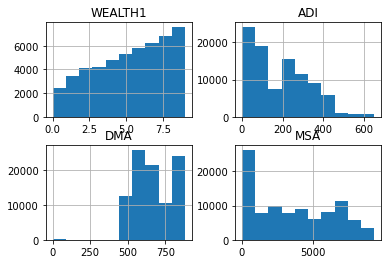

In [194]:
lst = ['WEALTH1', 'ADI', 'DMA', 'MSA']
data[lst].hist()

In [195]:
nulls_lst = nulls.loc[lst]
nulls_lst

,percentage
WEALTH1,46.882992
ADI,0.138347
DMA,0.138347
MSA,0.138347


In [196]:
dfnum['WEALTH1'].fillna(method='bfill', inplace=True)
dfnum['ADI'].fillna(dfnum['ADI'].median(), inplace=True)
dfnum['DMA'].fillna(dfnum['DMA'].median(), inplace=True)
dfnum['MSA'].fillna(dfnum['MSA'].median(), inplace=True)

In [197]:
nulls = pd.DataFrame(nulls_lst.isna().sum()*100/len(nulls_lst), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(30)

,percentage
percentage,0.0


#### 3. Use appropriate EDA technique where ever necessary.

In [198]:
data['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [199]:
dfcat['GEOCODE2'] = dfcat['GEOCODE2'].replace(' ', 'A')
dfcat['GEOCODE2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64